In [1]:
import os
for dirname, _, filenames in os.walk('datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

datasets\label klasifikasi kecurangan voice.txt
datasets\test\audio\1 0010.wav
datasets\test\audio\1 0021.wav
datasets\test\audio\1 0023.wav
datasets\test\audio\1 0030.wav
datasets\test\audio\1 0035.wav
datasets\test\audio\1 0039.wav
datasets\test\audio\1 0045.wav
datasets\test\audio\1 0050.wav
datasets\test\audio\1 0054.wav
datasets\test\audio\1 0058.wav
datasets\test\audio\1 0059.wav
datasets\test\audio\1 0065.wav
datasets\test\audio\1 0068.wav
datasets\test\audio\1 0072.wav
datasets\test\audio\1 0078.wav
datasets\test\audio\1 0085.wav
datasets\test\audio\1 0087.wav
datasets\test\audio\1 0093.wav
datasets\test\audio\1 0096.wav
datasets\test\audio\1 0098.wav
datasets\test\audio\2 0019.wav
datasets\test\audio\2 0023.wav
datasets\test\audio\2 0026.wav
datasets\test\audio\2 0032.wav
datasets\test\audio\2 0037.wav
datasets\test\audio\2 0041.wav
datasets\test\audio\2 0049.wav
datasets\test\audio\2 0056.wav
datasets\test\audio\2 0060.wav
datasets\test\audio\2 0061.wav
datasets\test\audio\2 

In [12]:
from os.path import isdir, join
from pathlib import Path
import pandas as pd

# Math
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa

from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd

%matplotlib inline

In [13]:
import os
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")

In [14]:
train_audio_path = 'C:/Users/ASUS/Untitled Folder/Sample-TA/datasets/train/audio/'

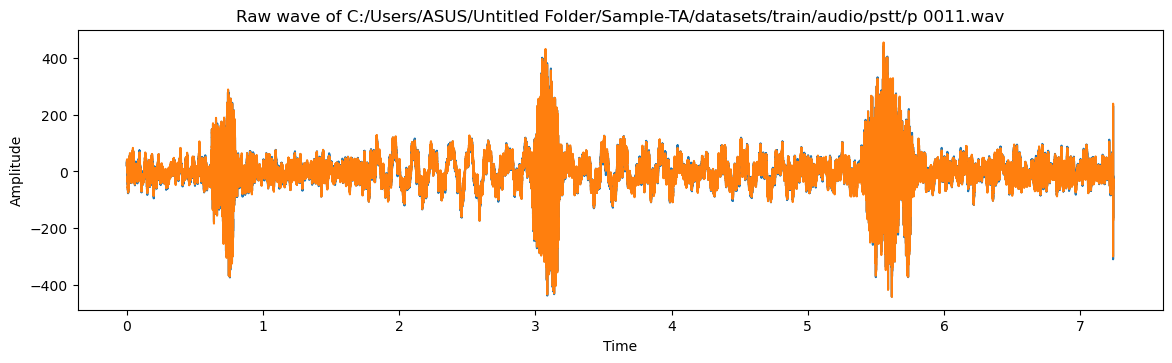

Sample Rate: 44100
Number of Samples: 319387


In [15]:
filename = 'pstt/p 0011.wav'
sample_rate, samples = wavfile.read(train_audio_path + filename)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + train_audio_path + 'pstt/p 0011.wav')
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, len(samples) / sample_rate, len(samples)), samples)
plt.show()
print('Sample Rate:', sample_rate)
print('Number of Samples:', len(samples))

In [37]:
import soundfile as sf

samples_int16 = samples.astype(np.int16)
sf.write('audio.wav', samples_int16, sample_rate)
ipd.Audio('audio.wav')


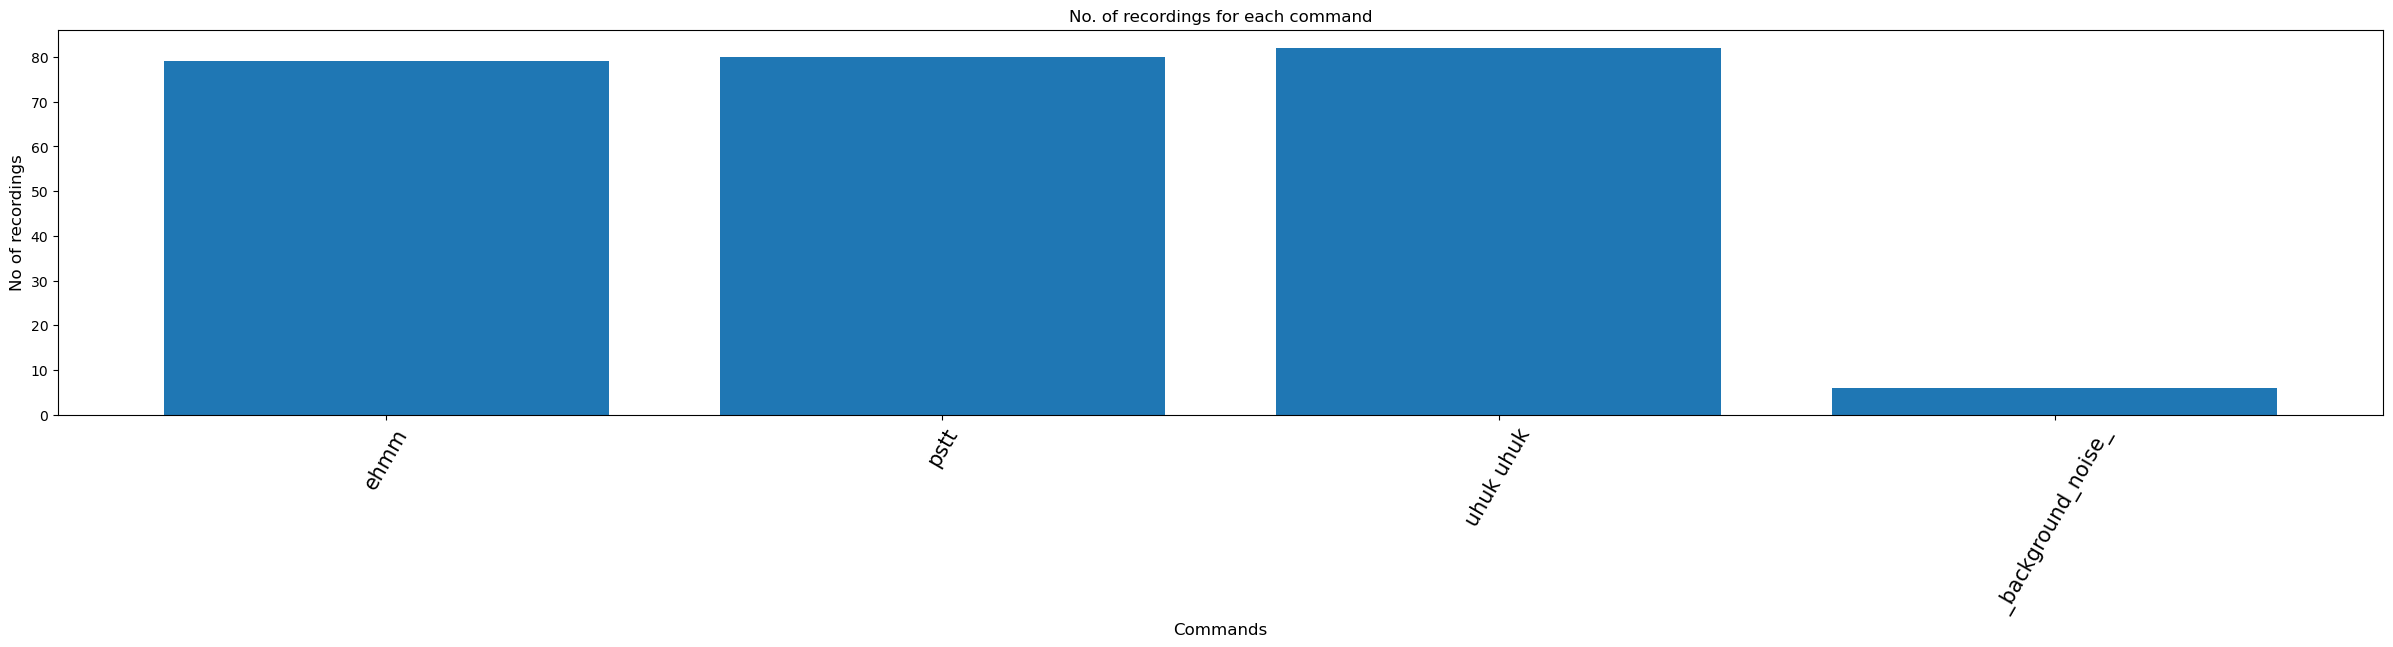

In [48]:
labels=os.listdir(train_audio_path)

#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

labels=["pstt", "_background_noise_", "ehmm", "uhuk-uhuk"]

In [49]:
duration_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + "/" +label +"/") if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
    
plt.hist(np.array(duration_of_recordings))

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/ASUS/Untitled Folder/Sample-TA/datasets/train/audio/uhuk-uhuk/'

In [50]:
import os
import librosa
import numpy as np

train_audio_path = 'C:/Users/ASUS/Untitled Folder/Sample-TA/datasets/train/audio'

all_wave = []
all_label = []
desired_length = 8000

for label in os.listdir(train_audio_path):
    print(label)
    waves = [f for f in os.listdir(os.path.join(train_audio_path, label)) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(os.path.join(train_audio_path, label, wav), sr=16000)
        if len(samples) < desired_length:
            samples = np.pad(samples, (0, desired_length - len(samples)))
        elif len(samples) > desired_length:
            samples = samples[:desired_length]
        all_wave.append(samples)
        all_label.append(label)



ehmm
pstt
uhuk uhuk
_background_noise_


In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)
print(classes)

['_background_noise_', 'ehmm', 'pstt', 'uhuk uhuk']


In [52]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))
print(y)

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0.

In [53]:
all_wave = np.array(all_wave).reshape(-1,8000,1)
print(all_wave)


[[[-7.6243386e-04]
  [-1.2831766e-03]
  [-1.1207937e-03]
  ...
  [-6.9462968e-04]
  [-6.3518615e-04]
  [-6.4464263e-04]]

 [[ 2.1887326e-04]
  [ 3.0673505e-04]
  [ 2.9720381e-04]
  ...
  [-4.5246659e-03]
  [-4.4145151e-03]
  [-4.3734196e-03]]

 [[ 3.1122571e-04]
  [ 6.0418941e-04]
  [ 4.5506033e-04]
  ...
  [ 5.3564797e-04]
  [ 5.4264558e-04]
  [ 5.2827934e-04]]

 ...

 [[ 6.6107178e-01]
  [ 3.1683350e-01]
  [ 4.2083740e-01]
  ...
  [ 1.0031128e-01]
  [ 1.9882202e-01]
  [-4.3670654e-02]]

 [[ 0.0000000e+00]
  [ 0.0000000e+00]
  [ 0.0000000e+00]
  ...
  [-6.1645508e-03]
  [-3.6621094e-02]
  [-4.3273926e-02]]

 [[-5.3894043e-02]
  [-4.9334717e-01]
  [-5.3335571e-01]
  ...
  [-7.0693970e-01]
  [ 5.6845093e-01]
  [-2.2463989e-01]]]


In [54]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)

In [55]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

tf.keras.backend.clear_session()
inputs = tf.keras.Input(shape=(8000,1))

model = Sequential()
conv = Conv1D(64, 3, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(2)(conv)
conv = Dropout(0.01)(conv)

conv = Conv1D(128, 3, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(2)(conv)
conv = Dropout(0.01)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(64, activation='relu')(conv)
#conv = Dense(1024, activation='relu')(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8000, 1)]         0         
                                                                 
 conv1d (Conv1D)             (None, 7998, 64)          256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 3999, 64)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 3999, 64)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 3997, 128)         24704     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1998, 128)        0         
 1D)                                                         

In [56]:
import tensorflow as tf
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

In [57]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.00001) 
mc = ModelCheckpoint('best_model.hdf5', save_weights_only=True, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [61]:
history=model.fit(x_tr, y_tr ,epochs=10, callbacks=[es,mc], batch_size=64, validation_data=(x_val,y_val))

Epoch 1/10
4/4 [==============================] - ETA: 0s - loss: 1.1979 - accuracy: 0.3350
Epoch 1: val_accuracy did not improve from 0.36000
4/4 [==============================] - 7s 1s/step - loss: 1.1979 - accuracy: 0.3350 - val_loss: 1.0972 - val_accuracy: 0.3400
Epoch 2/10
4/4 [==============================] - ETA: 0s - loss: 1.1167 - accuracy: 0.3553
Epoch 2: val_accuracy did not improve from 0.36000
4/4 [==============================] - 6s 1s/step - loss: 1.1167 - accuracy: 0.3553 - val_loss: 1.1087 - val_accuracy: 0.3600
Epoch 3/10
4/4 [==============================] - ETA: 0s - loss: 1.1459 - accuracy: 0.3503
Epoch 3: val_accuracy did not improve from 0.36000
4/4 [==============================] - 6s 2s/step - loss: 1.1459 - accuracy: 0.3503 - val_loss: 1.1155 - val_accuracy: 0.3600
Epoch 4/10
4/4 [==============================] - ETA: 0s - loss: 1.1209 - accuracy: 0.3604
Epoch 4: val_accuracy did not improve from 0.36000
4/4 [==============================] - 6s 1s/step 

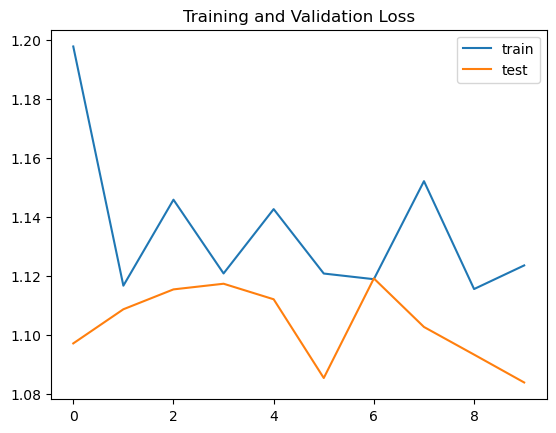

In [62]:
from matplotlib import pyplot 

pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test')
plt.title('Training and Validation Loss')
pyplot.legend()
pyplot.show()

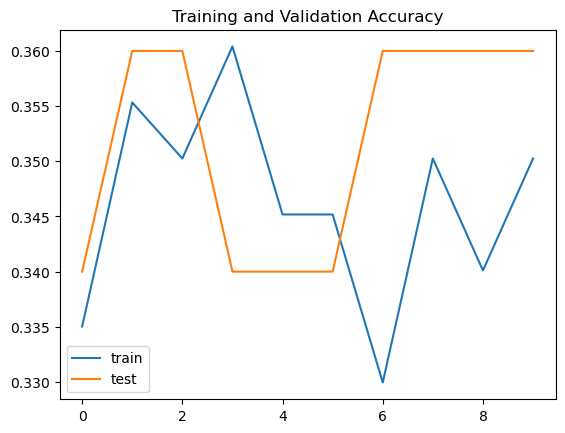

In [63]:
from matplotlib import pyplot 

pyplot.plot(history.history['accuracy'], label='train') 
pyplot.plot(history.history['val_accuracy'], label='test')
plt.title('Training and Validation Accuracy')
pyplot.legend()
pyplot.show()

In [ ]:
def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

In [ ]:
import random
import numpy as np
import IPython.display as ipd

index = random.randint(0, len(x_val) - 1)
samples = x_val[index].ravel()
print("Audio:", classes[np.argmax(y_val[index])])
ipd.Audio(samples, rate=8000)


In [ ]:
print("Text:",predict(samples))

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
model = VGG16(weights = 'imagenet',
              include_top = 'False',
              input_shape = (224, 224, 3))

In [ ]:
model.summary()

In [ ]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa as lib
import librosa.display
import IPython.display as ipd

from itertools import cycle
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [ ]:
y, sr = librosa.load(os.path.join(train_audio_path, label, wav))
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

In [ ]:
pd.Series(y).plot(figsize=(10, 5),
                 lw=1,
                 title='RAW Audio',
                 color=color_pal[0])
plt.show()

In [ ]:
# Trimming leading/lagging silence
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10, 5),
                         lw=1,
                         title='Raw Audio Trimmed',
                        color=color_pal[1])
plt.show()

In [ ]:
pd.Series(y[30000:30500]).plot(figsize=(10, 5),
                 lw=1,
                 title='RAW Audio Zoomed',
                 color=color_pal[2])
plt.show()

In [ ]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

In [ ]:
import librosa

D = librosa.stft(y)
S_db = np.squeeze(S_db)
sample_rate = librosa.get_samplerate(os.path.join(train_audio_path, label, wav))

fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              sr=sample_rate,
                              hop_length=256,
                              ax=ax)
ax.set_title('Spectrogram 2D', fontsize=20)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
plt.show()


In [ ]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram 3D', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [ ]:
S = librosa.feature.melspectrogram(y=y,
                                 sr=sr,
                                 n_mels=128, )
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
# Plot the mel spectogram
img = librosa.display.specshow(librosa.power_to_db(S_db_mel, ref=np.max),
                              x_axis='time',
                              y_axis='mel',
                              ax=ax)
ax.set_title('Mel Spectogram', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [ ]:
S_db_mel